In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
#from sklearn.cluster import DivisiveClustering

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv",nrows=100)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,100.000000,100.000000,100.000000,100.00000,100.000000,83.000000,100.0
mean,35729.090000,67.280000,0.270000,0.21000,134.580100,30.104819,1.0
std,23128.429725,11.679283,0.446196,0.40936,62.042053,6.250559,0.0
min,712.000000,39.000000,0.000000,0.00000,58.090000,20.200000,1.0
25%,13439.500000,58.000000,0.000000,0.00000,82.215000,26.250000,1.0
50%,35931.000000,69.000000,0.000000,0.00000,105.320000,28.900000,1.0
75%,56712.000000,78.000000,1.000000,0.00000,195.600000,32.650000,1.0
max,72366.000000,82.000000,1.000000,1.00000,252.720000,48.900000,1.0


In [4]:
data.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
data.shape

(100, 12)

In [6]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Check the total number of null value in each column

In [7]:
data.isnull().sum()

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  17
smoking_status        0
stroke                0
dtype: int64

#### gender column data cleaning process

In [8]:
data.gender.value_counts()

Female    53
Male      47
Name: gender, dtype: int64

In [9]:
#Replacing male with value 1 & Female with 0
data.gender.replace({'Female':int(0),"Male":int(1),'Other':2},inplace=bool(1))

In [10]:
data.gender.head()

0    1
1    0
2    1
3    0
4    0
Name: gender, dtype: int64

In [11]:
data.gender.dtype

dtype('int64')

#### age column value counts

In [12]:
data.age.value_counts()

80    8
78    7
79    7
82    5
58    5
81    4
54    4
76    4
57    4
59    4
63    4
74    3
70    3
69    3
67    3
61    3
75    3
45    2
66    2
60    2
49    2
52    2
71    2
72    1
73    1
77    1
39    1
68    1
65    1
42    1
56    1
51    1
50    1
48    1
47    1
43    1
64    1
Name: age, dtype: int64

#### We'll work on work_type column

In [13]:
data.work_type.value_counts()

Private          67
Self-employed    22
Govt_job         11
Name: work_type, dtype: int64

In [14]:
#Replacing work_type value
data.work_type.replace({'Never_worked':0,"Govt_job":1,"children":2,"Self-employed":3,"Private":4},inplace=bool(1))

#### We'll work on Residence_type column

In [15]:
data.Residence_type.value_counts()

Urban    56
Rural    44
Name: Residence_type, dtype: int64

In [16]:
#Replacing Residence_type value
data.Residence_type.replace({'Urban':0,'Rural':1},inplace=bool(1))

#### Lets work on bmi

In [17]:
data.bmi.isnull().sum()

17

In [18]:
data.dropna(axis=0,how='any',inplace=True)

In [19]:
data.bmi.isnull().sum()

0

####  smoking_status

In [20]:
data.smoking_status.value_counts()

never smoked       37
formerly smoked    22
smokes             15
Unknown             9
Name: smoking_status, dtype: int64

In [21]:
#Replacing smoking_status value
data.smoking_status.replace({'smokes':0,'formerly smoked':1,"Unknown":2,"never smoked":3},inplace=True)

#### `ever_married column data cleaning

In [22]:
data.ever_married.value_counts()

Yes    74
No      9
Name: ever_married, dtype: int64

In [23]:
#Replacing ever_married value
data.ever_married.replace({'Yes':0,"No":1},inplace=True)

In [24]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,0,4,0,228.69,36.6,1,1
2,31112,1,80,0,1,0,4,1,105.92,32.5,3,1
3,60182,0,49,0,0,0,4,0,171.23,34.4,0,1
4,1665,0,79,1,0,0,3,1,174.12,24.0,3,1
5,56669,1,81,0,0,0,4,0,186.21,29.0,1,1


#### droping id column

In [25]:
data.drop(axis=1,columns=['id'],inplace=True)

In [26]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,0,4,0,228.69,36.6,1,1
2,1,80,0,1,0,4,1,105.92,32.5,3,1
3,0,49,0,0,0,4,0,171.23,34.4,0,1
4,0,79,1,0,0,3,1,174.12,24.0,3,1
5,1,81,0,0,0,4,0,186.21,29.0,1,1


In [27]:
data.dtypes

gender                 int64
age                    int64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [28]:
data_new =  data.astype(int)

### Here we are using single/minimum method

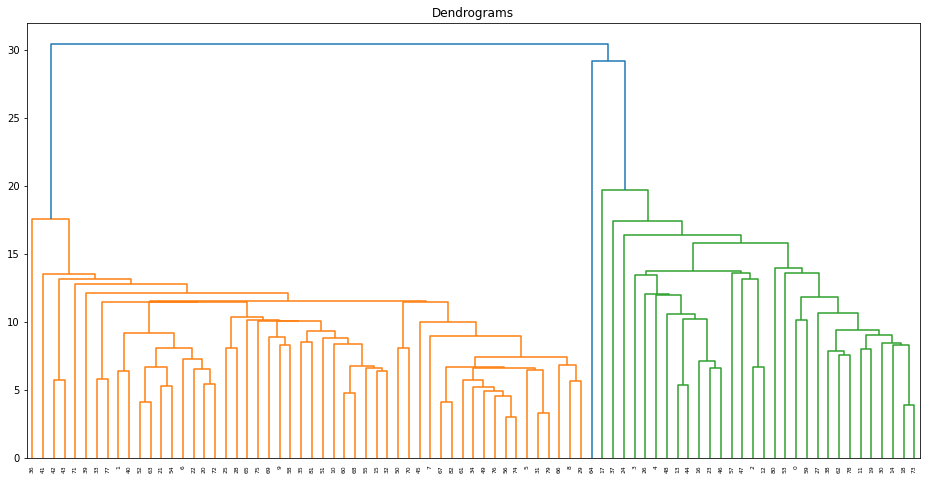

In [29]:
plt.figure(figsize=(16, 8))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_new, method='single'))

### Here we are using complete/maximum method

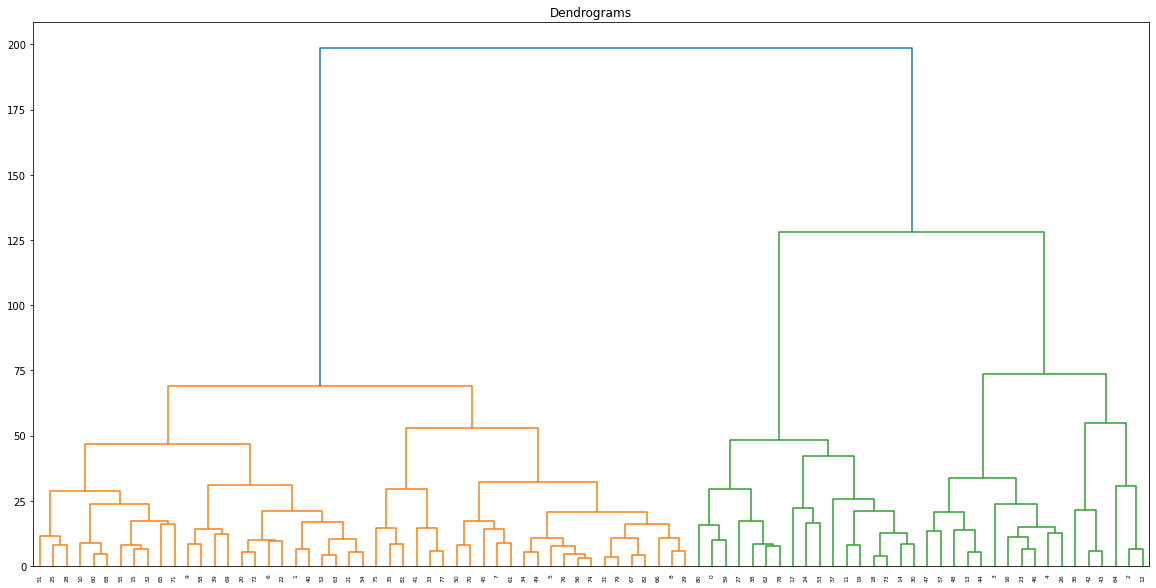

In [30]:
plt.figure(figsize=(20, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_new, method='complete'))

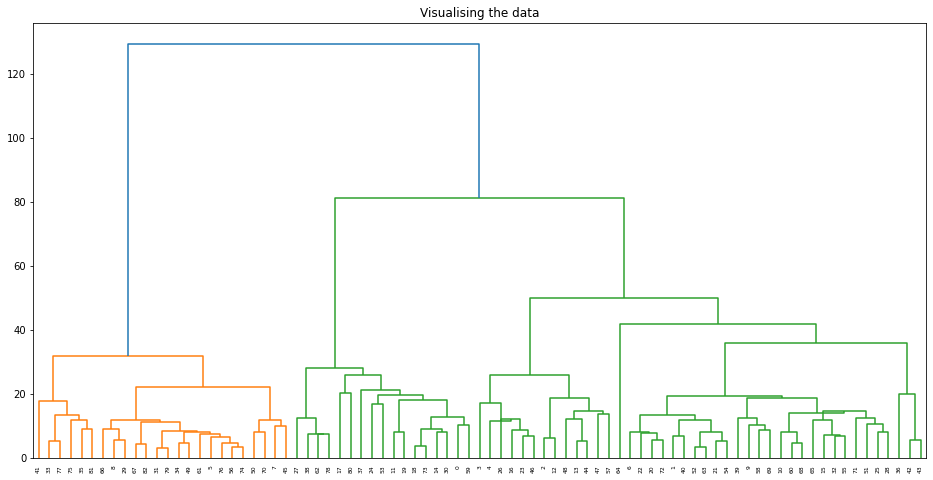

In [31]:
plt.figure(figsize =(16, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(data, method ='median')))

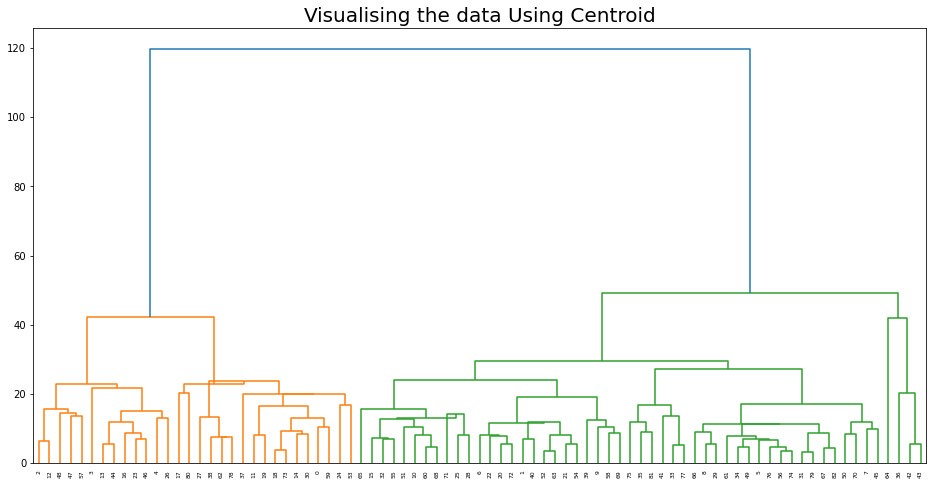

In [32]:
plt.figure(figsize =(16, 8))
plt.title('Visualising the data Using Centroid',fontsize=20)
Dendrogram = shc.dendrogram((shc.linkage(data, method ='centroid')))

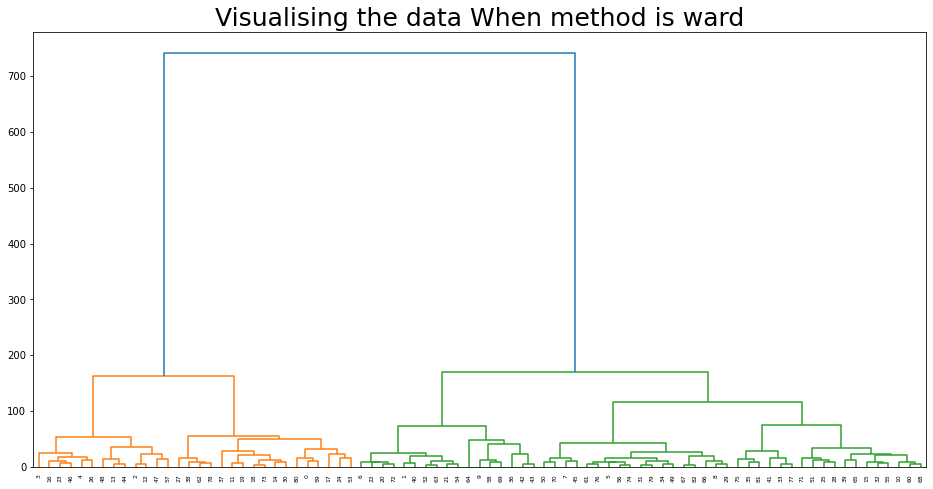

In [33]:
plt.figure(figsize =(16, 8))
plt.title('Visualising the data When method is ward',fontsize=25)
Dendrogram = shc.dendrogram((shc.linkage(data, method ='ward')))